<a href="https://colab.research.google.com/github/SainathReddy22/Tamato-disease-image-processing/blob/master/Tomato_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!nvidia-smi

Fri Sep 25 13:57:39 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    32W / 250W |   8891MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [17]:
!pip install tensorflow-gpu

In [18]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [19]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/New Plant Diseases Dataset(Augmented)/train'
valid_path = '/content/drive/My Drive/New Plant Diseases Dataset(Augmented)/valid'

In [20]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [21]:
for layer in vgg.layers:
  layer.trainable = False

In [22]:
folders = glob('/content/drive/My Drive/New Plant Diseases Dataset(Augmented)/train/*')

In [23]:
x = Flatten()(vgg.output)

prediction = Dense(len(folders), activation='softmax')(x)

In [24]:
model = Model(inputs=vgg.input, outputs=prediction)

In [25]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [26]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [27]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [28]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/New Plant Diseases Dataset(Augmented)/valid',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 18346 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [15]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
1147/1147 [==============================] - 14780s 13s/step - loss: 0.8185 - accuracy: 0.7452 - val_loss: 0.5789 - val_accuracy: 0.8231
Epoch 2/10
1147/1147 [==============================] - 230s 200ms/step - loss: 0.5305 - accuracy: 0.8428 - val_loss: 0.6628 - val_accuracy: 0.8297
Epoch 3/10
1147/1147 [==============================] - 230s 201ms/step - loss: 0.4361 - accuracy: 0.8713 - val_loss: 0.7355 - val_accuracy: 0.8120
Epoch 4/10
1147/1147 [==============================] - 230s 200ms/step - loss: 0.4190 - accuracy: 0.8841 - val_loss: 0.5804 - val_accuracy: 0.8582
Epoch 5/10
1147/1147 [==============================] - 230s 200ms/step - loss: 0.3407 - accuracy: 0.9023 - val_loss: 0.7256 - val_accuracy: 0.8321
Epoch 6/10
1147/1147 [==============================] - 229s 199ms/step - loss: 0.3358 - accuracy: 0.9041 - val_loss: 0.3376 - val_accuracy: 0.9075
Epoch 7/10
1147/1147 [==============

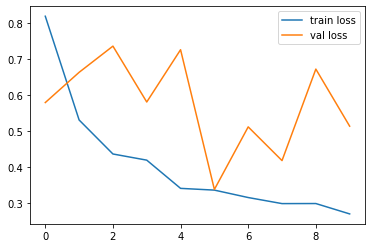

<Figure size 432x288 with 0 Axes>

In [29]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

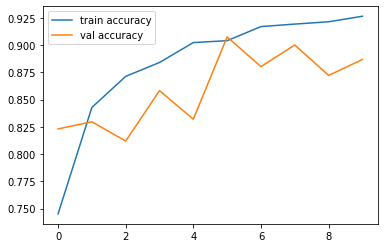

<Figure size 432x288 with 0 Axes>

In [31]:
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')